In [1]:
##### Network Representation, Queries, and Manipulation
import openpnm as op
import numpy as np
import matplotlib.pyplot as plt
op.visualization.set_mpl_style()

In [6]:
# generating a sample network
pn = op.network.Cubic(shape=[12, 6, 1], connectivity=26)
# adjacency network can be generated
am = pn.create_adjacency_matrix().todense()
print(am)

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]]


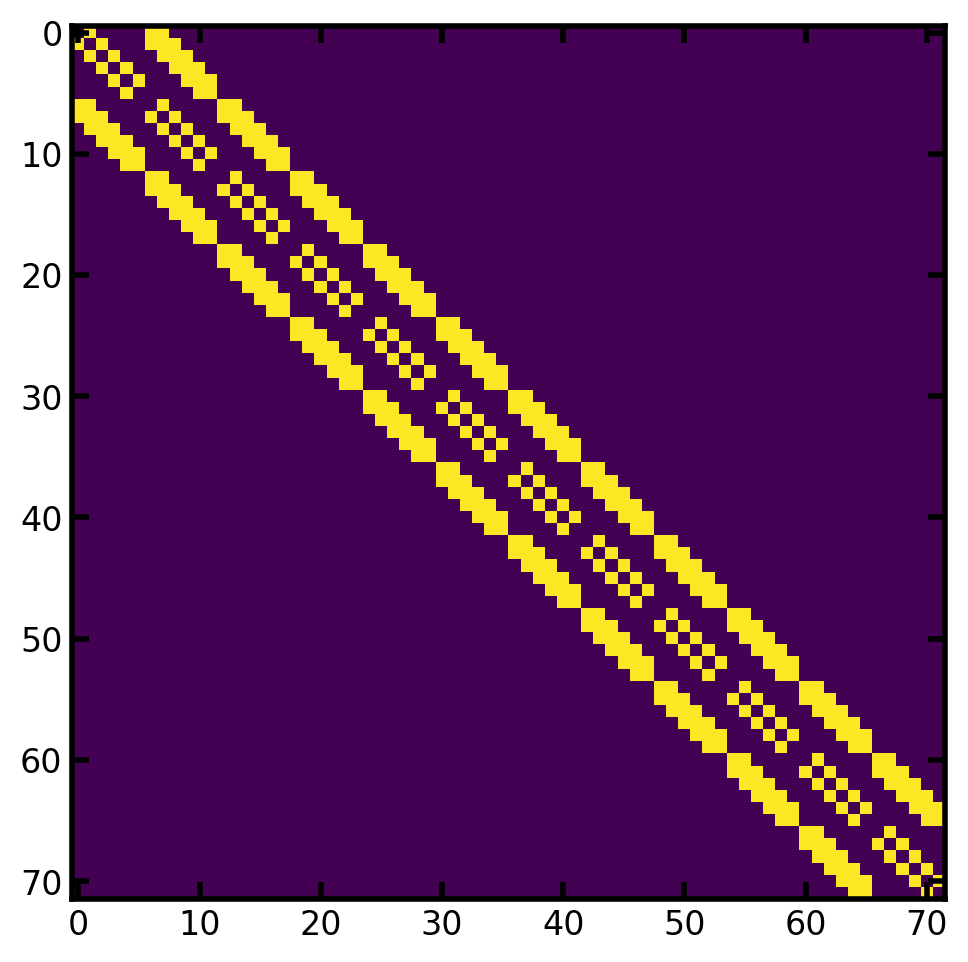

In [7]:
# which can be plotted as an image
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
ax.imshow(am);

In [5]:
# the network can be represented in a sparse format (COO) - preferred
am = pn.create_adjacency_matrix(triu=True)
print(am)

  (0, 1)	1
  (2, 3)	1
  (4, 5)	1
  (0, 2)	1
  (1, 3)	1
  (2, 4)	1
  (3, 5)	1
  (0, 3)	1
  (2, 5)	1
  (1, 2)	1
  (3, 4)	1


In [8]:
# the throat indices can be put into the adjacency matrix
# warning: be careful about the 0 indexing
am = pn.create_adjacency_matrix(weights=pn.Ts, triu=True)
print(am)

  (0, 1)	0
  (1, 2)	1
  (2, 3)	2
  (3, 4)	3
  (4, 5)	4
  (6, 7)	5
  (7, 8)	6
  (8, 9)	7
  (9, 10)	8
  (10, 11)	9
  (12, 13)	10
  (13, 14)	11
  (14, 15)	12
  (15, 16)	13
  (16, 17)	14
  (18, 19)	15
  (19, 20)	16
  (20, 21)	17
  (21, 22)	18
  (22, 23)	19
  (24, 25)	20
  (25, 26)	21
  (26, 27)	22
  (27, 28)	23
  (28, 29)	24
  :	:
  (37, 42)	211
  (38, 43)	212
  (39, 44)	213
  (40, 45)	214
  (41, 46)	215
  (43, 48)	216
  (44, 49)	217
  (45, 50)	218
  (46, 51)	219
  (47, 52)	220
  (49, 54)	221
  (50, 55)	222
  (51, 56)	223
  (52, 57)	224
  (53, 58)	225
  (55, 60)	226
  (56, 61)	227
  (57, 62)	228
  (58, 63)	229
  (59, 64)	230
  (61, 66)	231
  (62, 67)	232
  (63, 68)	233
  (64, 69)	234
  (65, 70)	235


In [9]:
# COO is not suitable for performing queries
# LIL can be used for queries of which pores are connected to which pores
am = pn.create_adjacency_matrix(weights=pn.Ts, fmt='lil', triu=False)
# displaying list of pores connected to pore at index of the list
for locations_of_nonzeros in am.rows:
    print(locations_of_nonzeros)

[1, 6, 7]
[0, 2, 6, 7, 8]
[1, 3, 7, 8, 9]
[2, 4, 8, 9, 10]
[3, 5, 9, 10, 11]
[4, 10, 11]
[0, 1, 7, 12, 13]
[0, 1, 2, 6, 8, 12, 13, 14]
[1, 2, 3, 7, 9, 13, 14, 15]
[2, 3, 4, 8, 10, 14, 15, 16]
[3, 4, 5, 9, 11, 15, 16, 17]
[4, 5, 10, 16, 17]
[6, 7, 13, 18, 19]
[6, 7, 8, 12, 14, 18, 19, 20]
[7, 8, 9, 13, 15, 19, 20, 21]
[8, 9, 10, 14, 16, 20, 21, 22]
[9, 10, 11, 15, 17, 21, 22, 23]
[10, 11, 16, 22, 23]
[12, 13, 19, 24, 25]
[12, 13, 14, 18, 20, 24, 25, 26]
[13, 14, 15, 19, 21, 25, 26, 27]
[14, 15, 16, 20, 22, 26, 27, 28]
[15, 16, 17, 21, 23, 27, 28, 29]
[16, 17, 22, 28, 29]
[18, 19, 25, 30, 31]
[18, 19, 20, 24, 26, 30, 31, 32]
[19, 20, 21, 25, 27, 31, 32, 33]
[20, 21, 22, 26, 28, 32, 33, 34]
[21, 22, 23, 27, 29, 33, 34, 35]
[22, 23, 28, 34, 35]
[24, 25, 31, 36, 37]
[24, 25, 26, 30, 32, 36, 37, 38]
[25, 26, 27, 31, 33, 37, 38, 39]
[26, 27, 28, 32, 34, 38, 39, 40]
[27, 28, 29, 33, 35, 39, 40, 41]
[28, 29, 34, 40, 41]
[30, 31, 37, 42, 43]
[30, 31, 32, 36, 38, 42, 43, 44]
[31, 32, 33, 37, 39, 

In [11]:
# displaying list of throats connected to pore at index of the list
for values_of_nonzeros in am.data:
    print(values_of_nonzeros)

[0, 60, 126]
[0, 1, 181, 61, 127]
[1, 2, 182, 62, 128]
[2, 3, 183, 63, 129]
[3, 4, 184, 64, 130]
[4, 185, 65]
[60, 181, 5, 66, 131]
[126, 61, 182, 5, 6, 186, 67, 132]
[127, 62, 183, 6, 7, 187, 68, 133]
[128, 63, 184, 7, 8, 188, 69, 134]
[129, 64, 185, 8, 9, 189, 70, 135]
[130, 65, 9, 190, 71]
[66, 186, 10, 72, 136]
[131, 67, 187, 10, 11, 191, 73, 137]
[132, 68, 188, 11, 12, 192, 74, 138]
[133, 69, 189, 12, 13, 193, 75, 139]
[134, 70, 190, 13, 14, 194, 76, 140]
[135, 71, 14, 195, 77]
[72, 191, 15, 78, 141]
[136, 73, 192, 15, 16, 196, 79, 142]
[137, 74, 193, 16, 17, 197, 80, 143]
[138, 75, 194, 17, 18, 198, 81, 144]
[139, 76, 195, 18, 19, 199, 82, 145]
[140, 77, 19, 200, 83]
[78, 196, 20, 84, 146]
[141, 79, 197, 20, 21, 201, 85, 147]
[142, 80, 198, 21, 22, 202, 86, 148]
[143, 81, 199, 22, 23, 203, 87, 149]
[144, 82, 200, 23, 24, 204, 88, 150]
[145, 83, 24, 205, 89]
[84, 201, 25, 90, 151]
[146, 85, 202, 25, 26, 206, 91, 152]
[147, 86, 203, 26, 27, 207, 92, 153]
[148, 87, 204, 27, 28, 208,

In [19]:
# DOK can be used to perform queries of which throat connects which pores
am = pn.create_adjacency_matrix(weights=pn.Ts, fmt='dok', triu=False)
print('pores (0, 1):', am[(0, 1)])

pores (0, 1): 0


In [20]:
# no throat returns -1
am = pn.create_adjacency_matrix(weights=pn.Ts+1, fmt='dok', triu=False)
print('pores (5, 5):', am[(5, 5)]-1)

pores (5, 5): -1


In [21]:
# Incidence matrix: pore x throat matrix - column should have exactly 2 1's -- not too helpful since we got the stuff above
im = pn.create_incidence_matrix().todense()
print(im)

[[1 0 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [24]:
# You can use queries from Network class!
pn = op.network.Cubic(shape=[4, 4, 1])
# You can specify the pores at a position using pores method
P_left = pn.pores('left')
P_bottom = pn.pores('back')
print(P_left)
print(P_bottom)

[0 1 2 3]
[ 3  7 11 15]


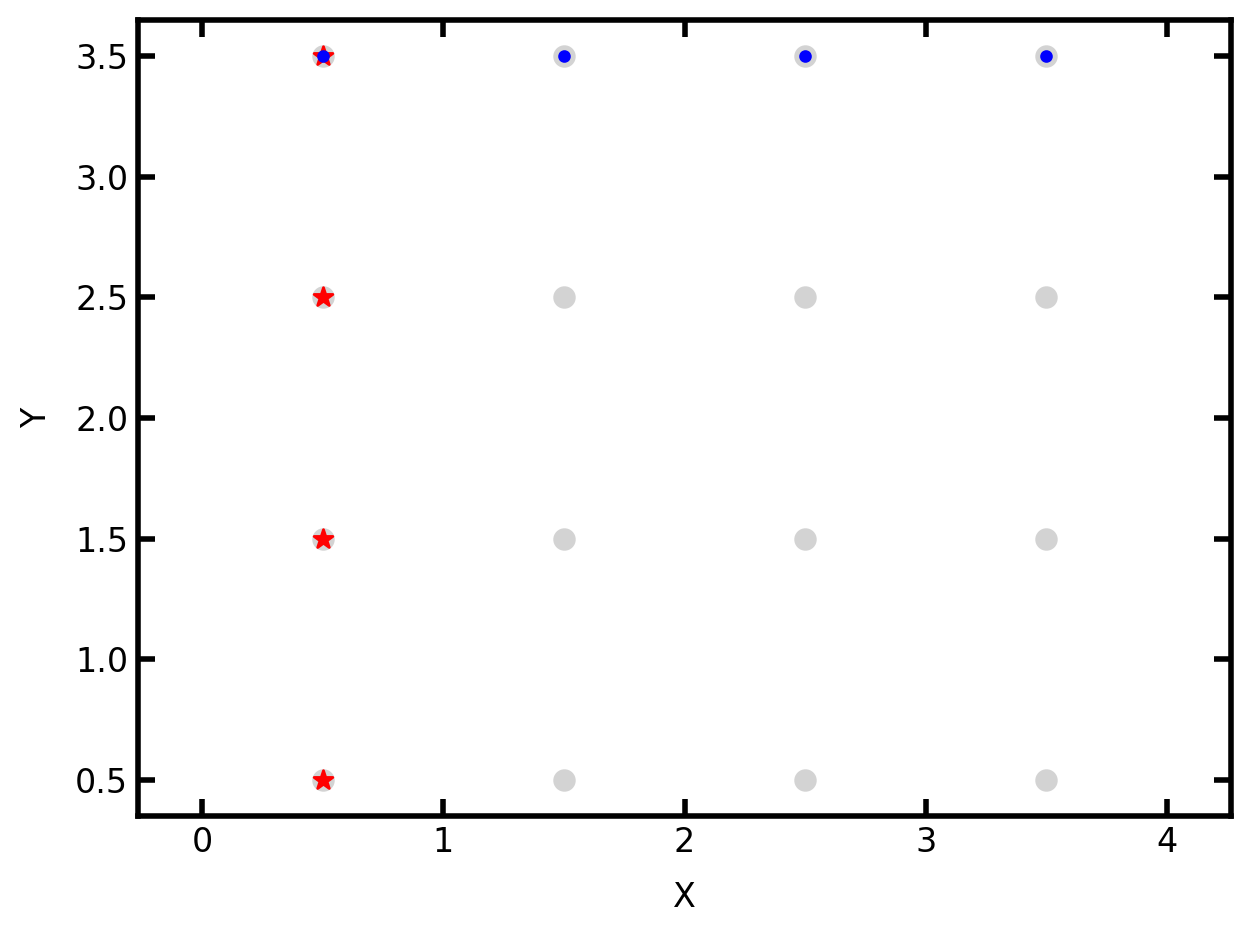

In [25]:
##### Finding neighboring pores and throats #####
# find_neighbor_pores
fig, ax = plt.subplots()
op.visualization.plot_coordinates(pn, pn.Ps, c='lightgrey', 
                                  markersize=50, ax=ax)
op.visualization.plot_coordinates(pn, P_left, c='red', marker='*', 
                                  markersize=50, ax=ax)
op.visualization.plot_coordinates(pn, P_bottom, c='blue', marker='.', 
                                  markersize=50, ax=ax);

In [26]:
# mode='or': all pores with one or more connections to the input pores
Ps = pn.pores(['left', 'back'])
print(Ps)
Ps = pn.find_neighbor_pores(pores=Ps, mode='or')
print(Ps)

[ 0  1  2  3  7 11 15]
[ 4  5  6 10 14]


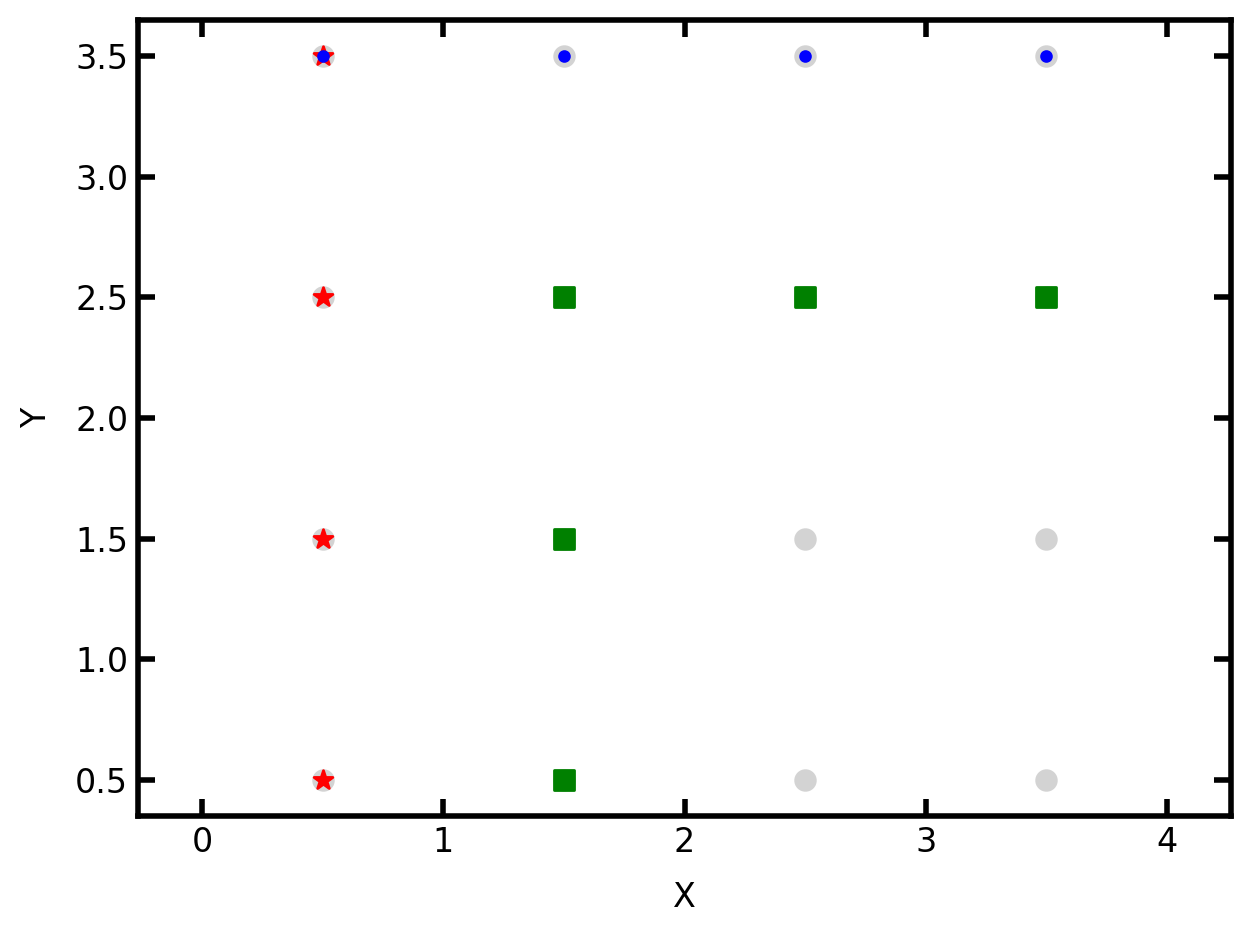

In [27]:
fig, ax = plt.subplots()
op.visualization.plot_coordinates(pn, pn.Ps, c='lightgrey',
                                  markersize=50, ax=ax)
op.visualization.plot_coordinates(pn, P_left, c='red', 
                                  markersize=50, marker='*', ax=ax)
op.visualization.plot_coordinates(pn, P_bottom, c='blue', 
                                  markersize=50, marker='.', ax=ax)
op.visualization.plot_coordinates(pn, Ps, c='green', 
# more                                  markersize=50, marker='s', ax=ax);

In [28]:
# mode='nor': all pores with exactly one connection to input pores
Ps = pn.pores(['left', 'back'])
print(Ps)
Ps = pn.find_neighbor_pores (pores=Ps, mode='xor')
print(Ps)


[ 0  1  2  3  7 11 15]
[ 4  5 10 14]


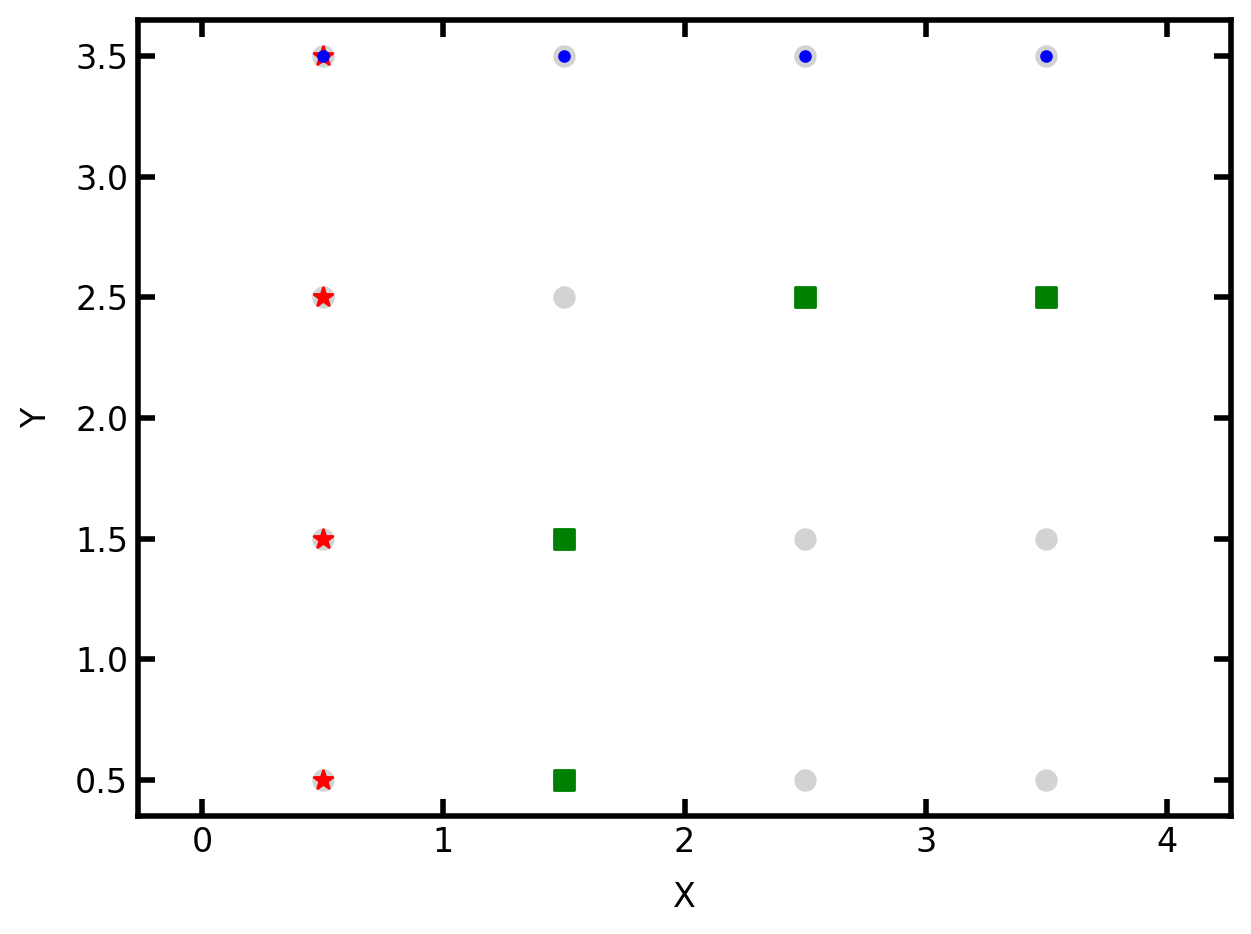

In [29]:
fig, ax = plt.subplots()
op.visualization.plot_coordinates(pn, pn.Ps, c='lightgrey',
                                  markersize=50, ax=ax)
op.visualization.plot_coordinates(pn, P_left, c='red', 
                                  markersize=50, marker='*', ax=ax)
op.visualization.plot_coordinates(pn, P_bottom, c='blue', 
                                  markersize=50, marker='.', ax=ax)
op.visualization.plot_coordinates(pn, Ps, c='green', 
                                  markersize=50, marker='s', ax=ax);

In [31]:
# mode='xnor': pores with 2 or more connections to input pores (essentially and?)
Ps = pn.pores(['left', 'back'])
print(Ps)
Ps = pn.find_neighbor_pores(pores=Ps, mode='xnor')
print(Ps)

[ 0  1  2  3  7 11 15]
[6]


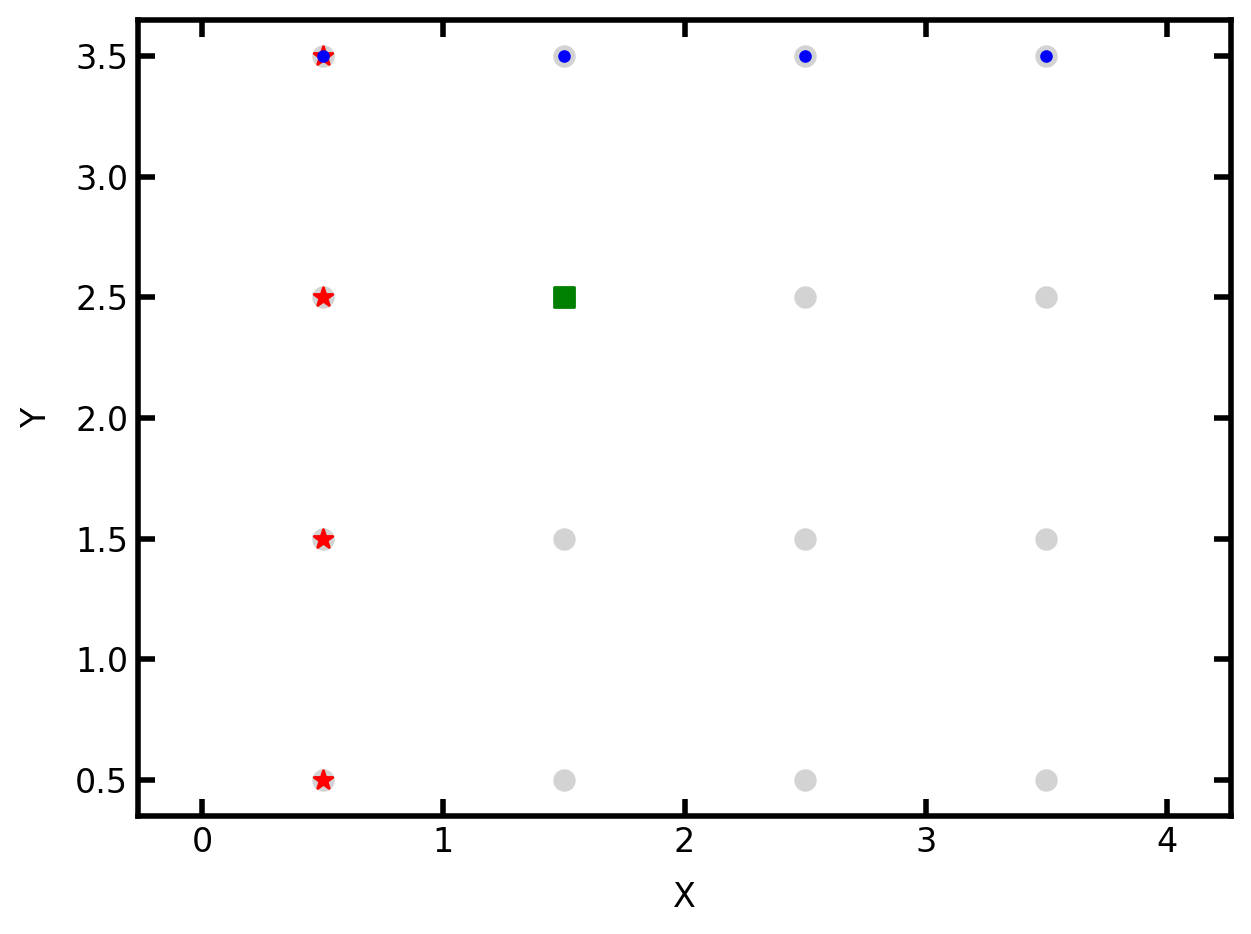

In [32]:
fig, ax = plt.subplots()
op.visualization.plot_coordinates(pn, pn.Ps, c='lightgrey', 
                                  markersize=50, ax=ax)
op.visualization.plot_coordinates(pn, P_left, c='red', 
                                  markersize=50, marker='*', ax=ax)
op.visualization.plot_coordinates(pn, P_bottom, c='blue', 
                                  markersize=50, marker='.', ax=ax)
op.visualization.plot_coordinates(pn, Ps, c='green', 
                                  markersize=50, marker='s', ax=ax);

In [35]:
##### Finding neighboring throats #####
# using find_neighbor_throats
# mode='or': throat connected to any input pores
Ps = pn.pores(['left', 'back'])
Ts = pn.find_neighbor_throats(pores=Ps, mode='or')
print(Ts)

[ 0  1  2  5  8 11 12 13 14 15 19 23]


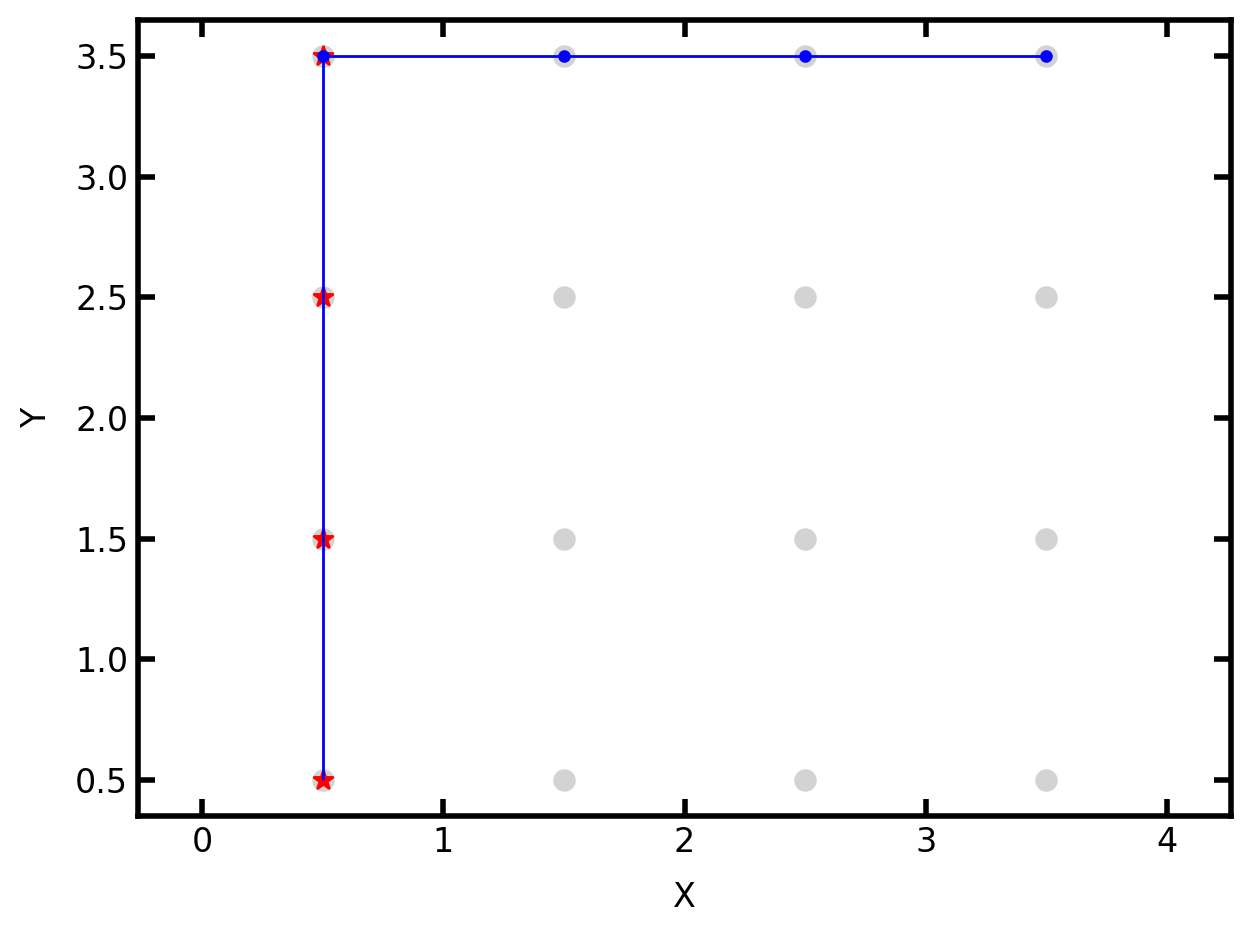

In [38]:
fig, ax = plt.subplots()
op.visualization.plot_connections(pn, Ts, ax=ax)
op.visualization.plot_coordinates(pn, pn.Ps, c='lightgrey', 
                                  markersize=50, ax=ax)
op.visualization.plot_coordinates(pn, P_left, c='red', 
                                  markersize=50, marker='*', ax=ax)
op.visualization.plot_coordinates(pn, P_bottom, c='blue', 
                                  markersize=50, marker='.', ax=ax);


In [37]:
# mode='xnor': throats shared by input pores only
Ps = pn.pores(['left', 'back'])
Ts = pn.find_neighbor_throats(pores=Ps, mode='xnor')
print(Ts)

[ 0  1  2 15 19 23]


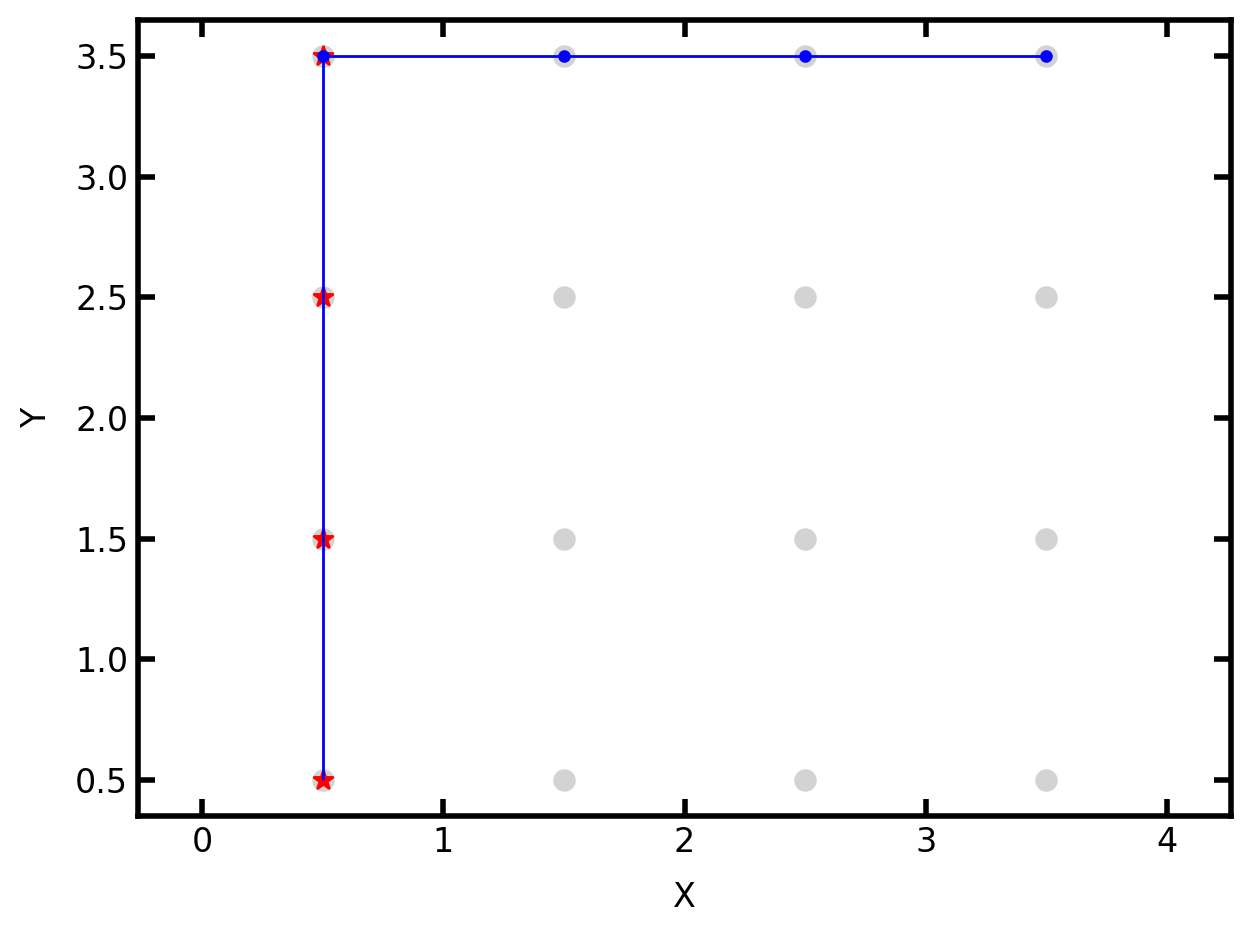

In [39]:
fig, ax = plt.subplots()
op.visualization.plot_connections(pn, Ts, ax=ax)
op.visualization.plot_coordinates(pn, pn.Ps, c='lightgrey', 
                                  markersize=50, ax=ax)
op.visualization.plot_coordinates(pn, P_left, c='red', 
                                  markersize=50, marker='*', ax=ax)
op.visualization.plot_coordinates(pn, P_bottom, c='blue', 
                                  markersize=50, marker='.', ax=ax);

In [40]:
# mode='xor': throats connected to one input pore only
Ps = pn.pores(['left', 'back'])
Ts = pn.find_neighbor_throats(pores=Ps, mode='xor')
print(Ts)

[ 5  8 11 12 13 14]


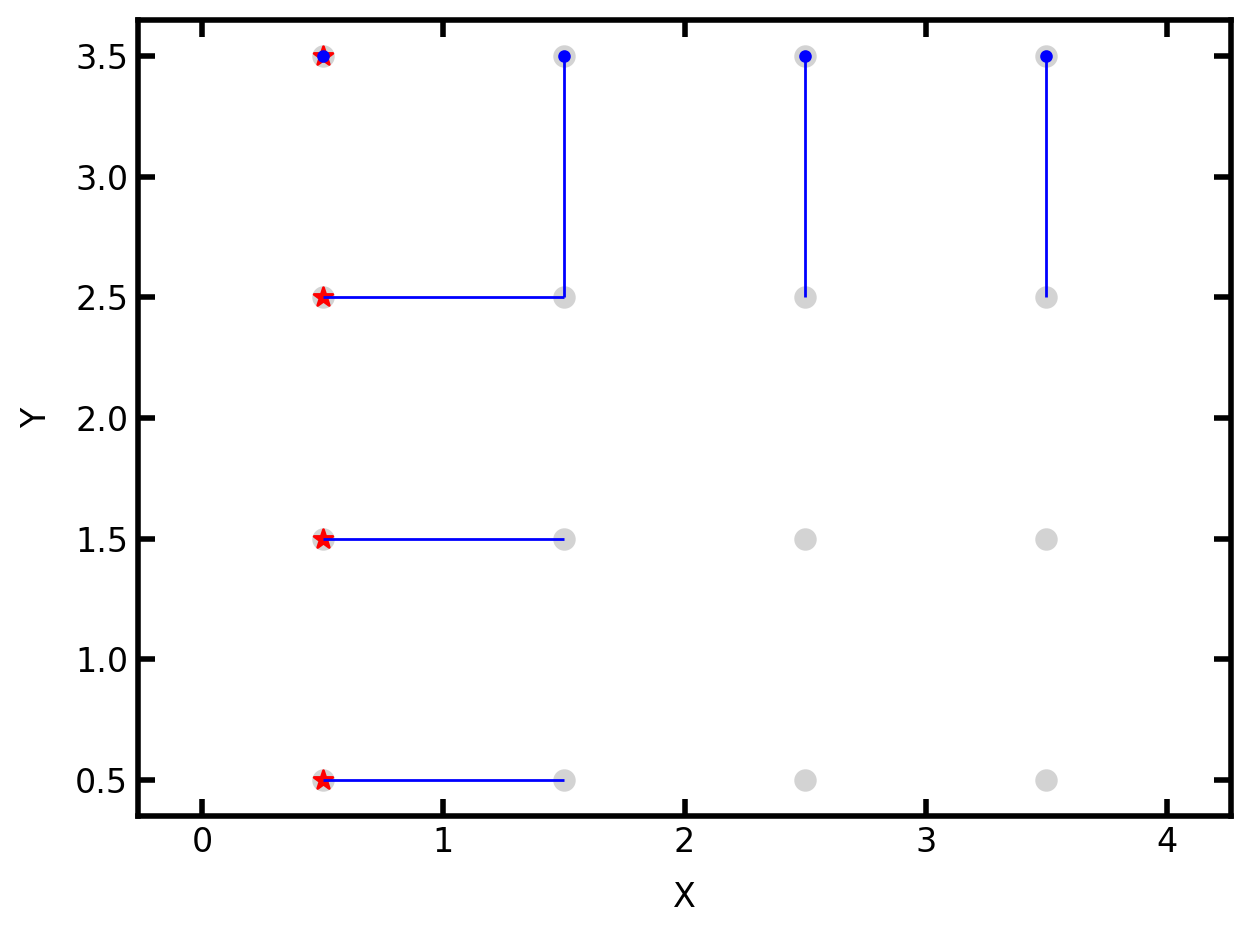

In [41]:
fig, ax = plt.subplots()
op.visualization.plot_connections(pn, Ts, ax=ax)
op.visualization.plot_coordinates(pn, pn.Ps, c='lightgrey', 
                                  markersize=50, ax=ax)
op.visualization.plot_coordinates(pn, P_left, c='red', 
                                  markersize=50, marker='*', ax=ax)
op.visualization.plot_coordinates(pn, P_bottom, c='blue', 
                                  markersize=50, marker='.', ax=ax);

In [45]:
##### Finding connecting throats #####
# Giving two sets of pores, find which throats connect pores of the same index (?) using find_connecitng_throat
P1 = [0, 1, 2, 3]
P2 = [4, 5, 6, 7]
Ts = pn.find_connecting_throat(P1, P2)
print(Ts)

[nan nan 14. 15.]


In [46]:
# if there's no connections, nans are returned
P1 = [0, 1, 2, 3]
P2 = [7, 7, 7, 7]
Ts = pn.find_connecting_throat(P1, P2)
print(Ts)

[nan nan nan 15.]


In [48]:
##### Find connected pores #####
# find the pores connected by throats using find_connected_pores
Ps = pn.find_connected_pores(throats=[0, 1, 2])
print(Ps)

[[0 1]
 [1 2]
 [2 3]]


In [49]:
# which can be done using indexing as well
Ps = pn['throat.conns'][[0, 1, 2]]
print(Ps)

[[0 1]
 [1 2]
 [2 3]]


In [50]:
# you can also condense it to remove duplications
print(np.unique(Ps))

[0 1 2 3]


In [51]:
# which is the same as using the flatten argument
Ps = pn.find_connected_pores(throats=[0, 1, 2], flatten=True)
print(Ps)

[0 1 2 3]


In [53]:
##### Removing throats #####
# could be applicable to study blockage effects, etc.
# example: we want to remove row 0 and 3
pn = op.network.Cubic(shape=[3, 2, 1])
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Cubic at 0x1ce59577d10>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.coords                                                         6 / 6
  3  throat.conns                                                        7 / 7
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.xmin                                                               2
  3  pore.xmax                                                               2
  4  pore.ymin                                                               3
  5 

In [54]:
# the easiest way is to keep the rows we want using mask
mask = np.ones(pn.Nt, dtype=bool)
mask[[0, 3]] = False
pn['throat.conns'] = pn['throat.conns'][mask]
pn['throat.surface'] = pn['throat.surface'][mask]
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Cubic at 0x1ce59577d10>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.coords                                                         6 / 6
  3  throat.conns                                                        5 / 5
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.xmin                                                               2
  3  pore.xmax                                                               2
  4  pore.ymin                                                               3
  5 

In [55]:
# you can also use the trim function - can handle complications
op.topotools.trim(network=pn, throats=[0, 3])
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Cubic at 0x1ce59577d10>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.coords                                                         6 / 6
  3  throat.conns                                                        3 / 3
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.xmin                                                               2
  3  pore.xmax                                                               2
  4  pore.ymin                                                               3
  5 

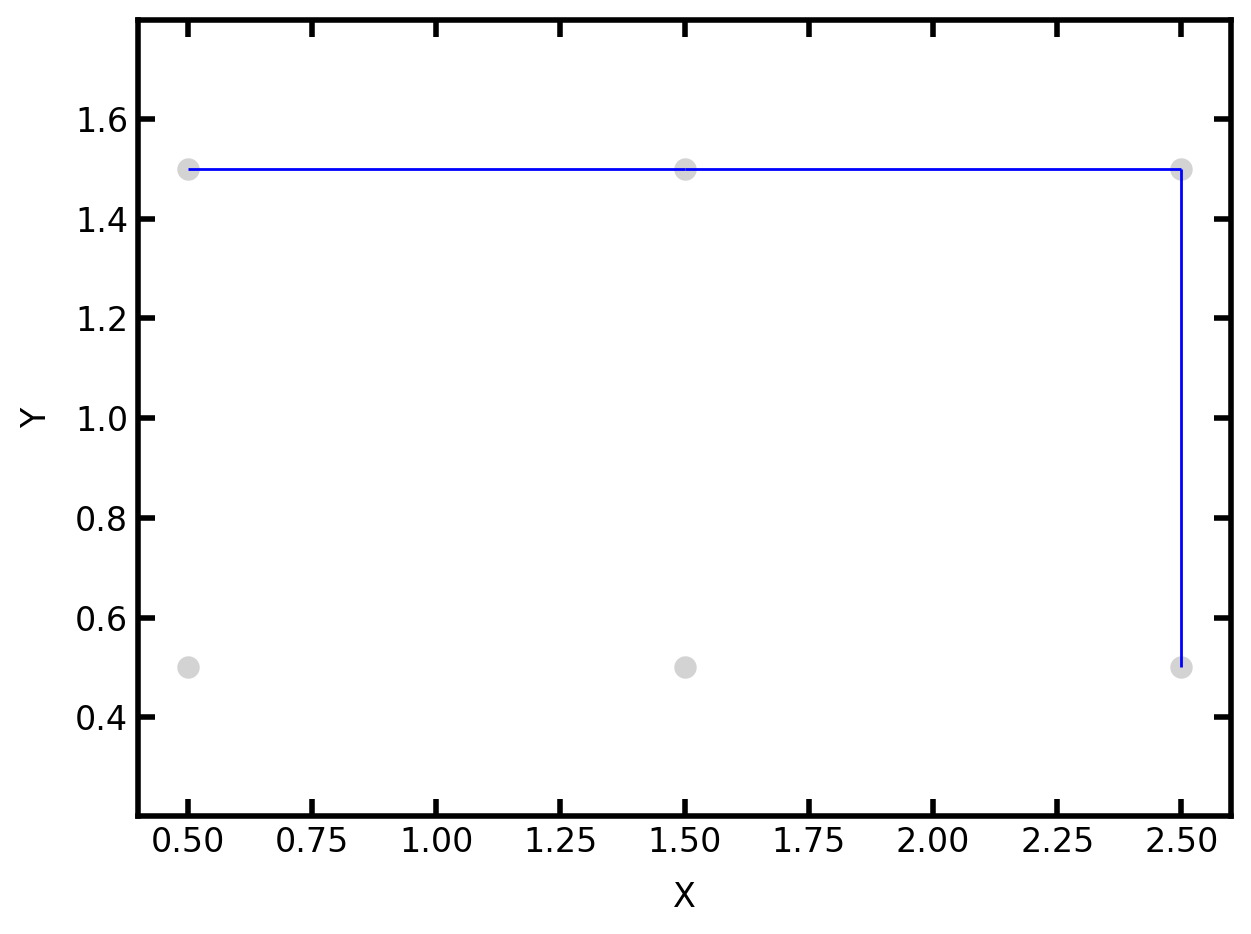

In [57]:
# visualizing the matrix - problem: isolated pores!
fig, ax = plt.subplots()
op.visualization.plot_coordinates(pn, pn.Ps, c='lightgrey', 
                                  markersize=50, ax=ax)
op.visualization.plot_connections(pn, ax=ax);

In [59]:
##### Removing pores #####
# almost as easy but you need to take into account: pore index updating, deleting a pore must delete all conencted throat
# first let's see how to do this manually
# - create an array where locations are trimmed
pn = op.network.Cubic(shape=[3, 2, 1])
totrim = np.zeros(pn.Np, dtype=int)
totrim[[2, 4]] = 1
print(totrim)

[0 0 1 0 1 0]


In [60]:
# - get an array with cumulative sum
offset = np.cumsum(totrim)
print(offset)

[0 0 1 1 2 2]


In [62]:
# - create an array that can remap throat connections
remap = pn.Ps - offset
print(remap)

[0 1 1 2 2 3]


In [63]:
# - delete the throats using trim
Ts = pn.find_neighbor_throats(pores=[2, 4])
op.topotools.trim(pn, throats=Ts)

In [64]:
# - delete pores iteratively
mask = np.ones(pn.Np, dtype=bool)
mask[[2, 4]] = False
for k, v in pn.items():
    if k.startswith('pore.'):
        pn[k] = v[mask]
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Cubic at 0x1ce595e1670>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.coords                                                         4 / 4
  3  throat.conns                                                        3 / 3
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.xmin                                                               2
  3  pore.xmax                                                               1
  4  pore.ymin                                                               1
  5 

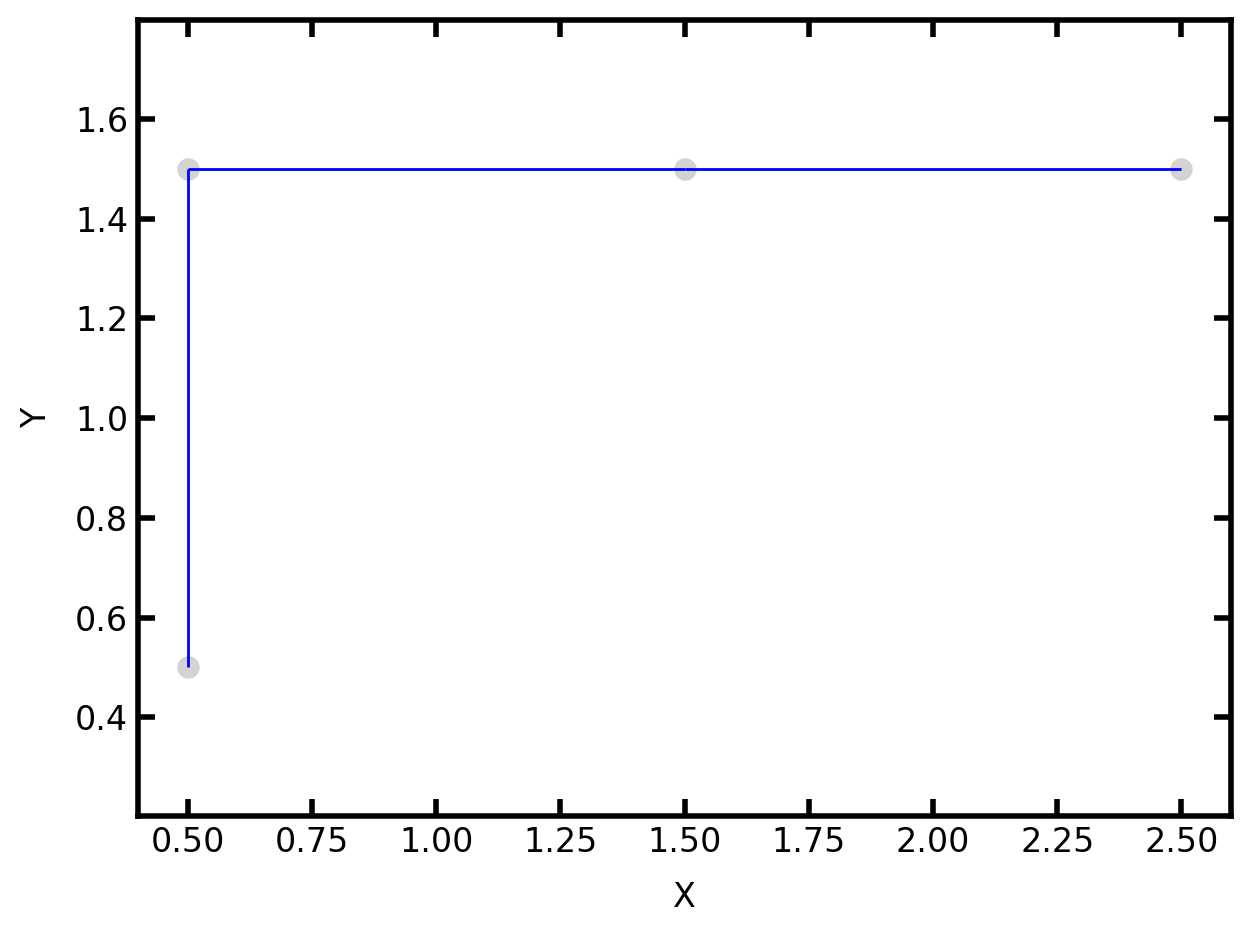

In [65]:
# - remap throat connections
pn['throat.conns'] = remap[pn['throat.conns']]
fig, ax = plt.subplots()
op.visualization.plot_coordinates(pn, c='lightgrey', 
                                  markersize=50, ax=ax)
op.visualization.plot_connections(pn, ax=ax);

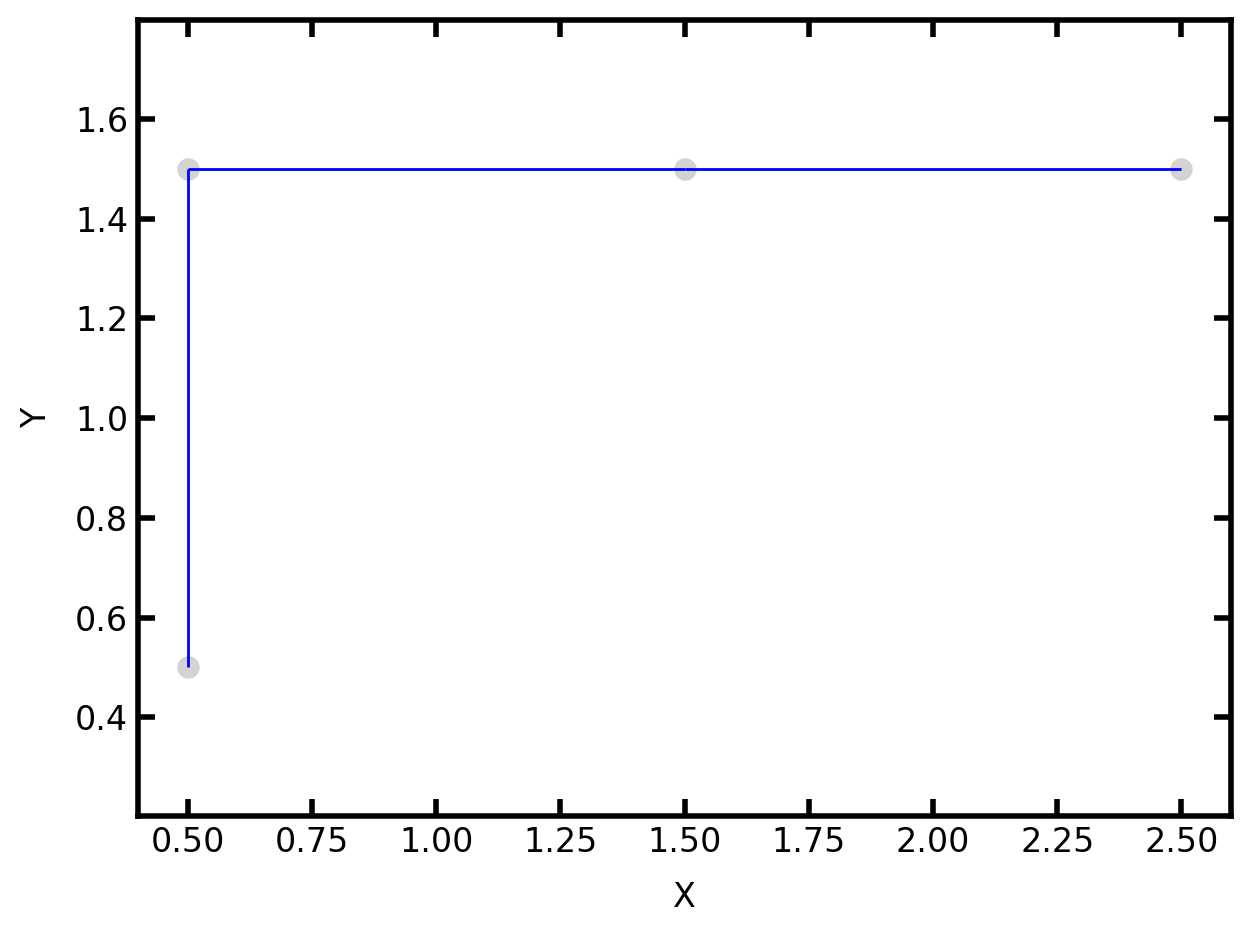

In [66]:
# easy way: trip directly
pn = op.network.Cubic(shape=[3, 2, 1])
op.topotools.trim(network=pn, pores=[2, 4])
fig, ax = plt.subplots()
op.visualization.plot_coordinates(pn, c='lightgrey', 
                                  markersize=50, ax=ax)
op.visualization.plot_connections(pn, ax=ax);

In [67]:
##### Adding pores and throats #####
# can be done manualy - but you have to add values to every array that exist
pn = op.network.Cubic(shape=[3, 2, 1])
new_pores = [[1.5, 2.5, 0.5], [3, 1, 0.5]]
coords = np.vstack((pn['pore.coords'], new_pores))
pn['pore.coords'] = coords
print(pn)


══════════════════════════════════════════════════════════════════════════════
net : <openpnm.network.Cubic at 0x1ce5b2ee2d0>
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Properties                                                   Valid Values
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.coords                                                         8 / 8
  3  throat.conns                                                        7 / 7
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  #  Labels                                                 Assigned Locations
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
  2  pore.xmin                                                               2
  3  pore.xmax                                                               2
  4  pore.ymin                                                               3
  5 

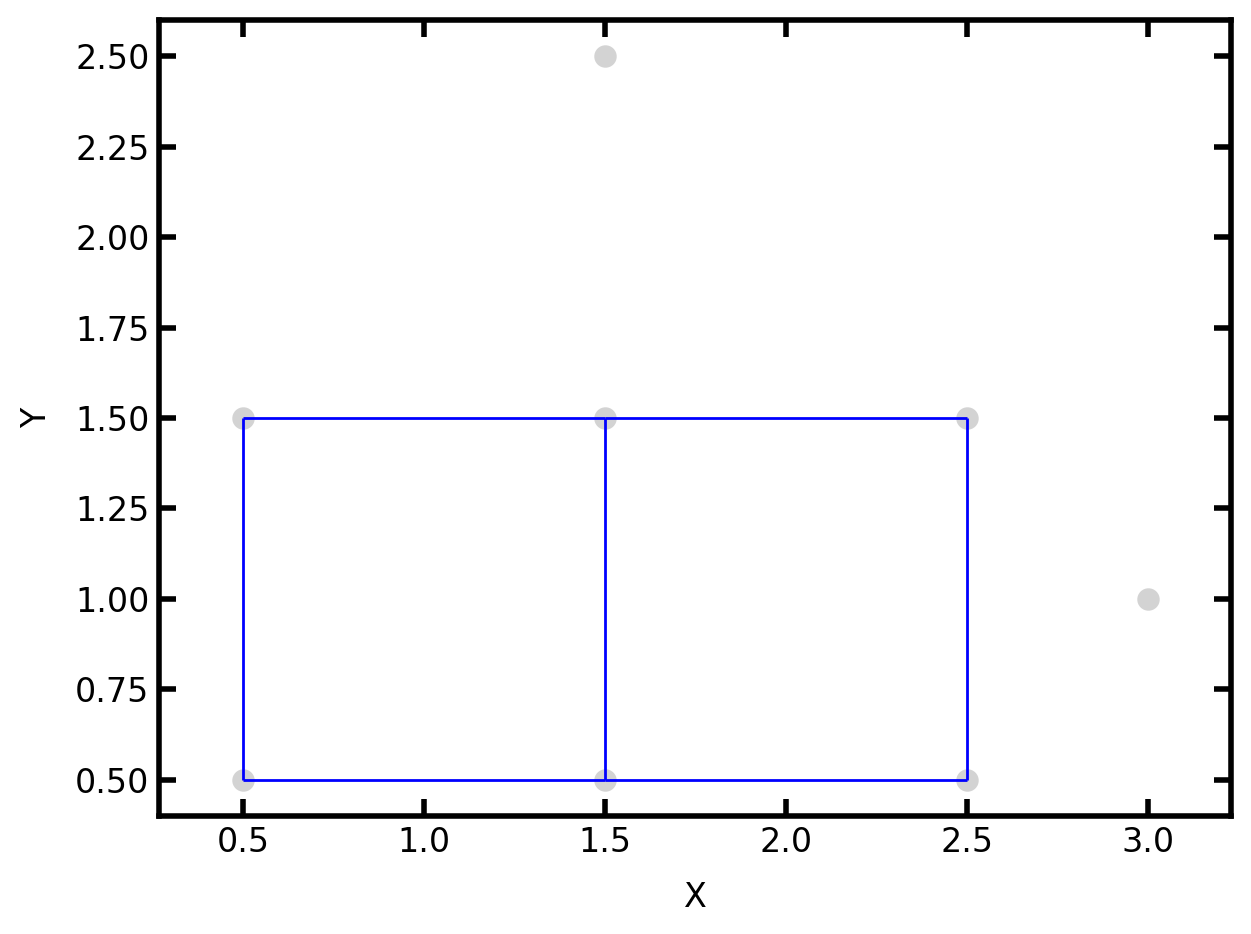

In [68]:
# then extend length of pore arrays
for k in pn.labels():
    if k.startswith('pore.'):
        pn[k] = np.hstack((pn[k], [False, False]))
fig, ax = plt.subplots()
op.visualization.plot_coordinates(pn, c='lightgrey', 
                                  markersize=50, ax=ax)
op.visualization.plot_connections(pn, ax=ax);

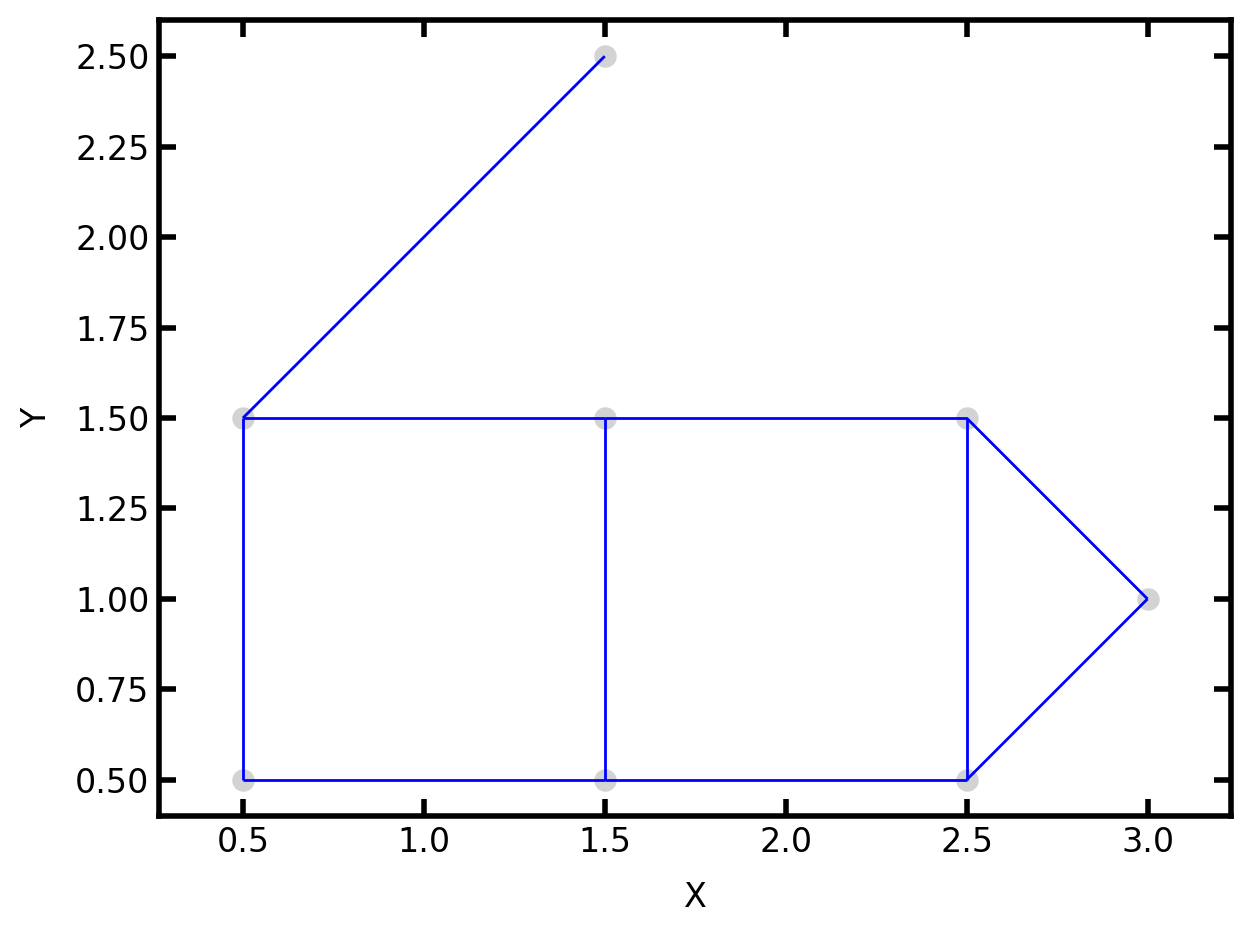

In [69]:
# and then add throats to new pores
new_conns = [[1, 6], [4, 7], [5, 7]]
conns = np.vstack((pn['throat.conns'], new_conns))
pn['throat.conns'] = conns
fig, ax = plt.subplots()
op.visualization.plot_coordinates(pn, c='lightgrey', 
                                  markersize=50, ax=ax)
op.visualization.plot_connections(pn, ax=ax);

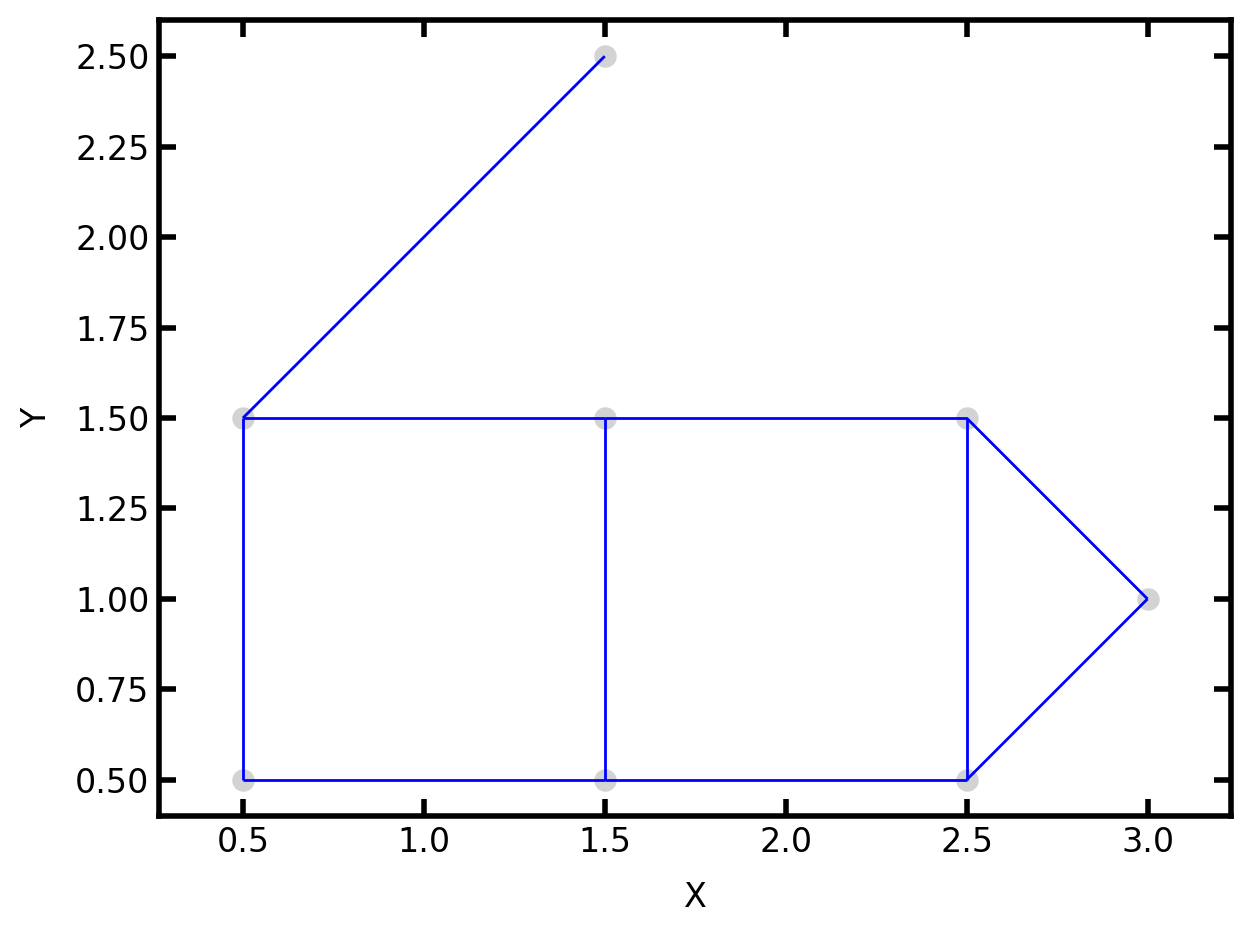

In [70]:
# easy way: extend method
pn = op.network.Cubic(shape=[3, 2, 1])
new_pores = [[1.5, 2.5, 0.5], [3, 1, 0.5]]
new_conns = [[1, 6], [4, 7], [5, 7]]
op.topotools.extend(network=pn, coords=new_pores)
op.topotools.extend(network=pn, conns=new_conns)
fig, ax = plt.subplots()
op.visualization.plot_coordinates(pn, c='lightgrey', 
                                  markersize=50, ax=ax)
op.visualization.plot_connections(pn, ax=ax);